In [56]:
import pandas as pd
df = pd.read_csv('Test de Usabilidad para Agente de Chat.csv')   
print(df['Nombre de usuario'].unique())     

['pamoyano@miuandes.cl' 'medelasotta@miuandes.cl' 'birogers@miuandes.cl'
 'cdiaz11@miuandes.cl' 'empalavicino@miuandes.cl' 'aigrandon@miuandes.cl'
 'jdplaza@miuandes.cl' 'mtguerra@miuandes.cl' 'racisternas@miuandes.cl'
 'jjcuevas@miuandes.cl' 'rabertens@miuandes.cl' 'mbespinoza@miuandes.cl'
 'basolis@miuandes.cl' 'jpmena@miuandes.cl' 'mourzua@miuandes.cl'
 'dhuidobro@miuandes.cl' 'ssapunar@miuandes.cl' 'azuiga@miuandes.cl'
 'awestermeier@miuandes.cl' 'sasepulveda2@miuandes.cl'
 'pvvillagran@miuandes.cl' 'oicarrasco@miuandes.cl'
 'jabeltran@miuandes.cl' 'aiberrios@miuandes.cl']


In [57]:
print(df.columns)

Index(['Marca temporal', 'Nombre de usuario', 'Creo que podría usar el agente de chat frecuentemente',
       'Encuentro el agente de chat innecesariamente complejo', 'Creo que el agente de chat fue fácil de utilizar',
       'Creo que necesitaría ayuda de una persona con conocimientos técnicos para usar el agente de chat',
       'Las funciones del agente de chat están bien integradas', 'Creo que el agente de chat es muy inconsistente',
       'Imagino que la mayoría de la gente aprendería a usar el agente de chat en forma muy rápida',
       'Encuentro que el agente de chat es muy difícil de usar', 'Me siento confiado al usar el agente de chat',
       'Necesité aprender muchas cosas antes de ser capaz de usar el agente de chat',
       'Los mensajes del agente de chat me motivaron a explicar mis ideas con mayor profundidad.',
       'El agente de chat me entregó indicaciones útiles para fortalecer mis argumentos.',
       'El agente de chat actuó como mediador para que los participa

In [58]:
mapping = {
    'pamoyano@miuandes.cl': 'P_Moy',
    'birogers@miuandes.cl': 'Benjamín Rogers',
    'cdiaz11@miuandes.cl': 'cristobal diaz',
    'empalavicino@miuandes.cl': 'Enzo Palavicino',
    'aigrandon@miuandes.cl': 'Antonia Grandon',
    'jdplaza@miuandes.cl': 'José Domingo Plaza',
    'mtguerra@miuandes.cl': 'Matias',
    'racisternas@miuandes.cl': 'Rodolfo Cisternas',
    'jjcuevas@miuandes.cl': 'Joaquin',
    'rabertens@miuandes.cl': 'Rodolfo B',
    'mbespinoza@miuandes.cl': 'Martin Espinoza',
    'basolis@miuandes.cl': 'Benjamin Solis',
    'jpmena@miuandes.cl': 'Juan Pablo Mena',
    'mourzua@miuandes.cl': 'María Olivia Urzúa',
    'dhuidobro@miuandes.cl': 'Domingo',
    'ssapunar@miuandes.cl': 'Simon Sapunar',
    'azuiga@miuandes.cl': 'Alberto Zúñiga',
    'awestermeier@miuandes.cl': 'Antonia',
    'sasepulveda2@miuandes.cl': 'Sergio Sepúlveda',
    'pvvillagran@miuandes.cl': 'Pablo Villagran',
    'oicarrasco@miuandes.cl': 'Oscar Ignacio Carrasco Alvarez',
    'jabeltran@miuandes.cl': 'Jorge Beltran',
    'aiberrios@miuandes.cl': 'Andrés Berrios '
}
df['Nombre de usuario'] = df['Nombre de usuario'].map(mapping)



print(df)


                     Marca temporal               Nombre de usuario  \
0   2025/11/17 11:43:58 a. m. GMT-3                           P_Moy   
1   2025/11/17 11:44:36 a. m. GMT-3                             NaN   
2   2025/11/17 11:44:56 a. m. GMT-3                 Benjamín Rogers   
3   2025/11/17 11:44:59 a. m. GMT-3                  cristobal diaz   
4   2025/11/17 11:45:31 a. m. GMT-3                 Enzo Palavicino   
5   2025/11/17 11:45:36 a. m. GMT-3                 Antonia Grandon   
6   2025/11/17 11:45:38 a. m. GMT-3              José Domingo Plaza   
7   2025/11/17 11:46:28 a. m. GMT-3                          Matias   
8   2025/11/17 11:46:35 a. m. GMT-3               Rodolfo Cisternas   
9   2025/11/17 11:47:38 a. m. GMT-3                         Joaquin   
10  2025/11/17 12:04:57 p. m. GMT-3                           P_Moy   
11  2025/11/17 12:05:32 p. m. GMT-3                 Benjamín Rogers   
12  2025/11/17 12:14:28 p. m. GMT-3                       Rodolfo B   
13  20

In [59]:
data = pd.read_csv('datos_messages_sesiones.csv')
data['room_session_id'] = data['room_session_id'].astype(str).str[:8]

session_users = (
    data.groupby('room_session_id')['user_id']
        .unique()
        .reset_index()
)

session_users_exploded = session_users.explode('user_id')
session_users_exploded = session_users_exploded.explode('user_id').dropna(subset=['user_id'])
session_users_exploded = session_users_exploded.rename(columns={'user_id': 'Nombre de usuario'})

print(session_users_exploded.columns)

df = df.merge(session_users_exploded, on='Nombre de usuario', how='left')
#print(df)
print(df.columns)
print()

Index(['room_session_id', 'Nombre de usuario'], dtype='object')
Index(['Marca temporal', 'Nombre de usuario', 'Creo que podría usar el agente de chat frecuentemente',
       'Encuentro el agente de chat innecesariamente complejo', 'Creo que el agente de chat fue fácil de utilizar',
       'Creo que necesitaría ayuda de una persona con conocimientos técnicos para usar el agente de chat',
       'Las funciones del agente de chat están bien integradas', 'Creo que el agente de chat es muy inconsistente',
       'Imagino que la mayoría de la gente aprendería a usar el agente de chat en forma muy rápida',
       'Encuentro que el agente de chat es muy difícil de usar', 'Me siento confiado al usar el agente de chat',
       'Necesité aprender muchas cosas antes de ser capaz de usar el agente de chat',
       'Los mensajes del agente de chat me motivaron a explicar mis ideas con mayor profundidad.',
       'El agente de chat me entregó indicaciones útiles para fortalecer mis argumentos.',
    

In [60]:
pd.set_option('display.max_columns', None)

# 1. Columnas de texto a eliminar
cols_texto = [
    '¿Qué es para ti lo más beneficioso de usar el agente de chat?',
    '¿Qué aspectos del agente de chat consideras que tienen que ser mejorados?'
]

# 2. Dejar solo columnas numéricas + room_session_id
df_numerico = df.drop(columns=cols_texto)

for col in df_numerico.columns:
    if col not in ['room_session_id', 'Nombre de usuario', 'Marca temporal']:
        df_numerico[col] = pd.to_numeric(df_numerico[col], errors='coerce')

# 3. Crear tablas de frecuencias por sala y pregunta
frecuencias = {}

for col in df_numerico.columns:
    if col not in ['room_session_id', 'Nombre de usuario', 'Marca temporal']:
        tabla = (
            df_numerico
            .groupby('room_session_id')[col]
            .value_counts(dropna=False)
            .unstack(fill_value=0)
        )
        frecuencias[col] = tabla

# 4. Imprimir resultados
for pregunta, tabla in frecuencias.items():
    print("\n===============================")
    print(f"Pregunta: {pregunta}")
    print("===============================")
    print(tabla)



Pregunta: Creo que podría usar el agente de chat frecuentemente
Creo que podría usar el agente de chat frecuentemente  1  2  3  4  5
room_session_id                                                     
3c334700                                               1  3  1  0  0
5bce17ae                                               2  2  0  0  0
7b554461                                               0  0  3  0  1
92e5445e                                               0  1  1  1  0
c220708e                                               1  1  2  0  1
fd701be3                                               1  0  2  0  1

Pregunta: Encuentro el agente de chat innecesariamente complejo
Encuentro el agente de chat innecesariamente complejo  1  2  3  4  5
room_session_id                                                     
3c334700                                               2  0  2  0  1
5bce17ae                                               0  0  1  3  0
7b554461                                  

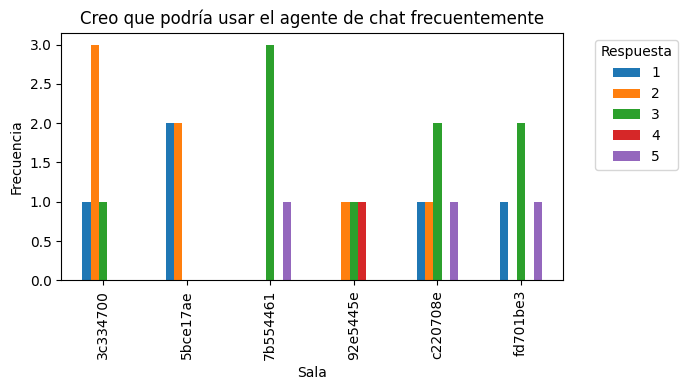

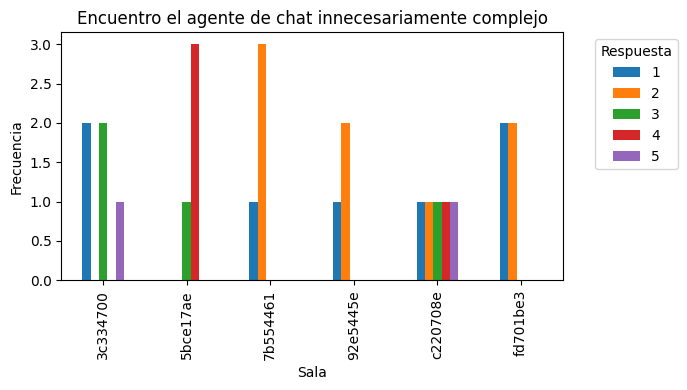

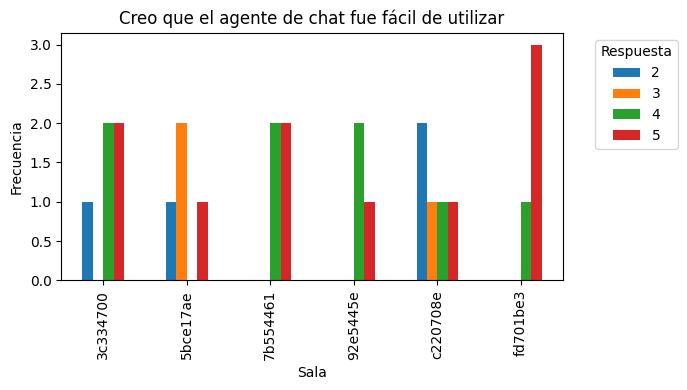

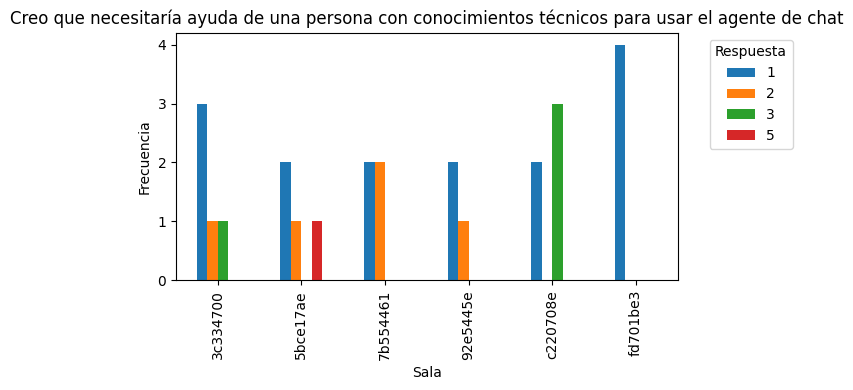

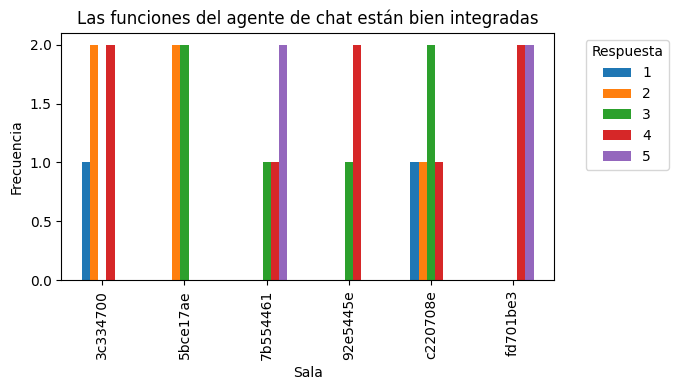

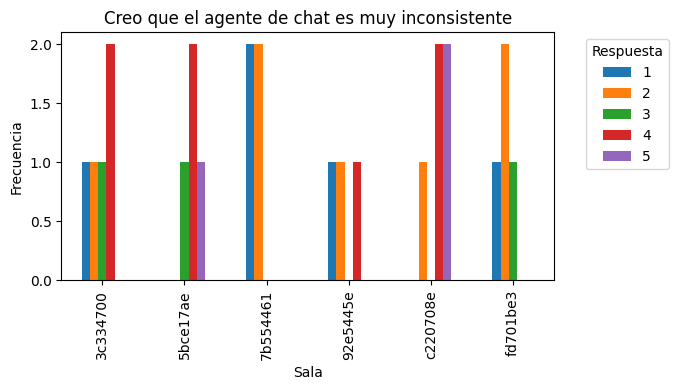

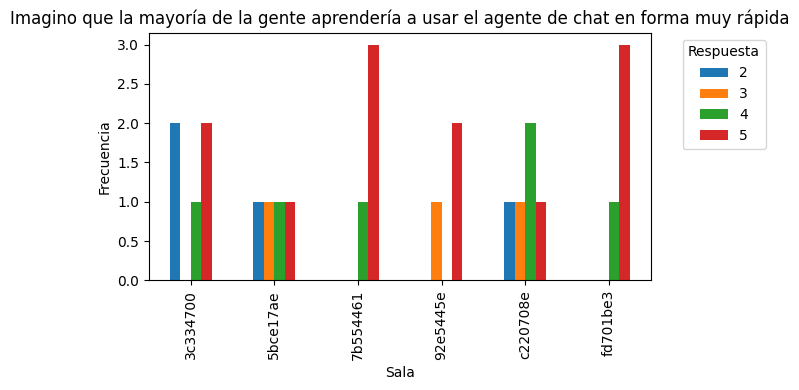

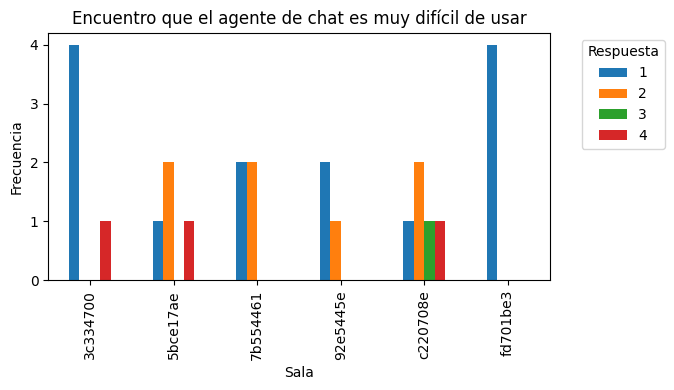

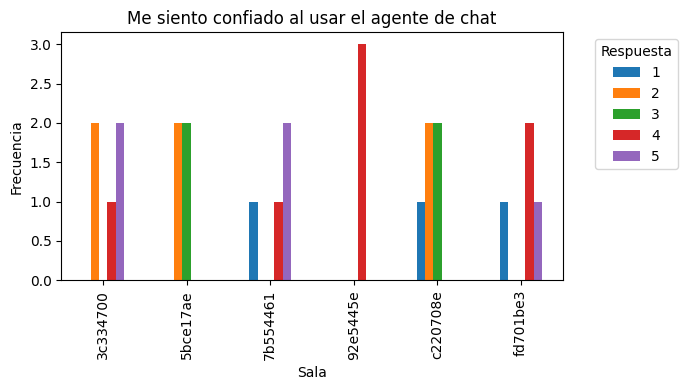

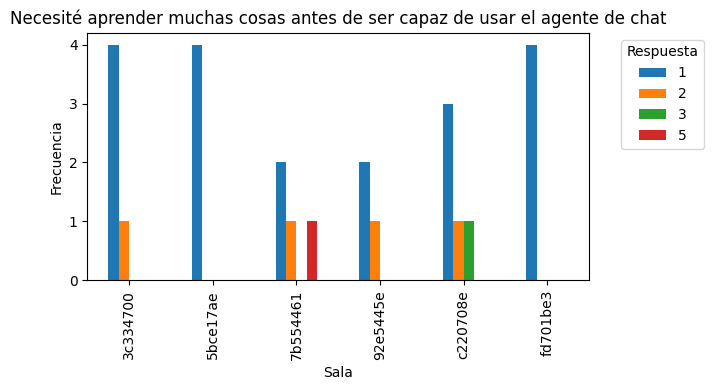

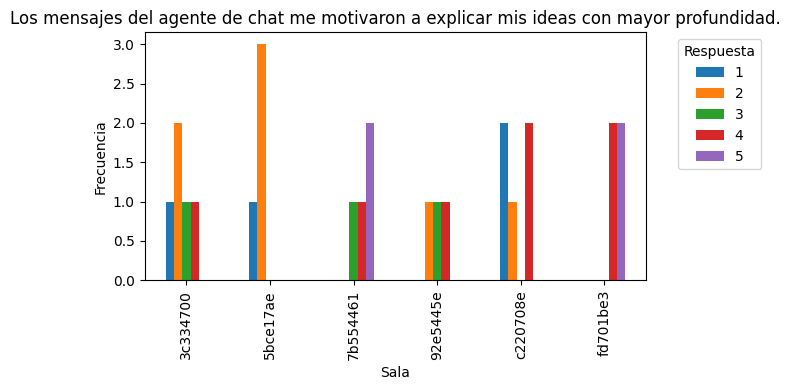

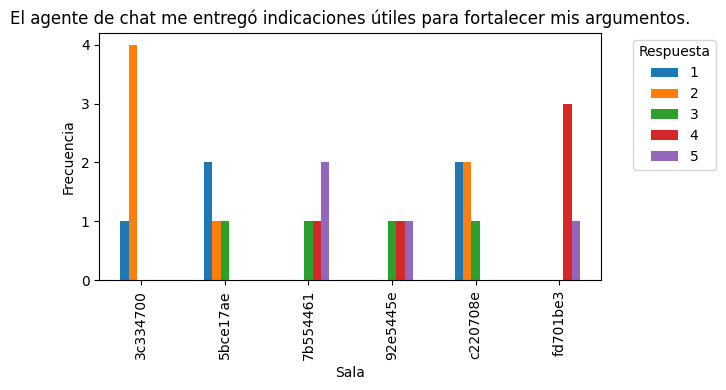

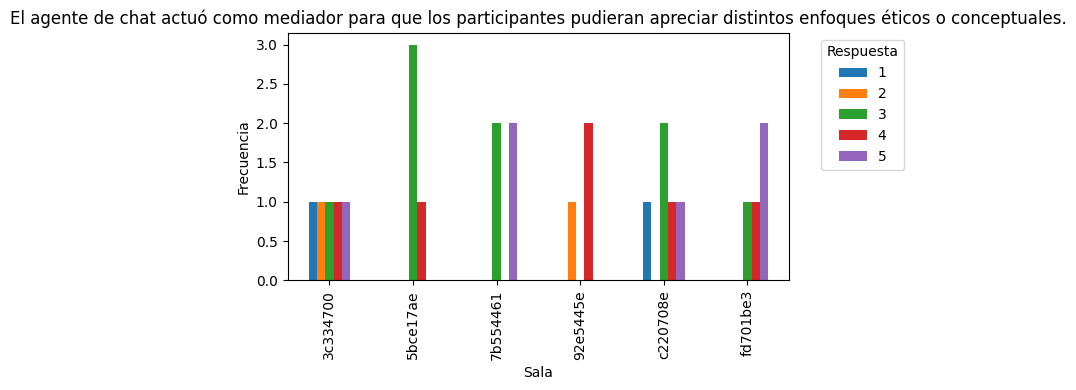

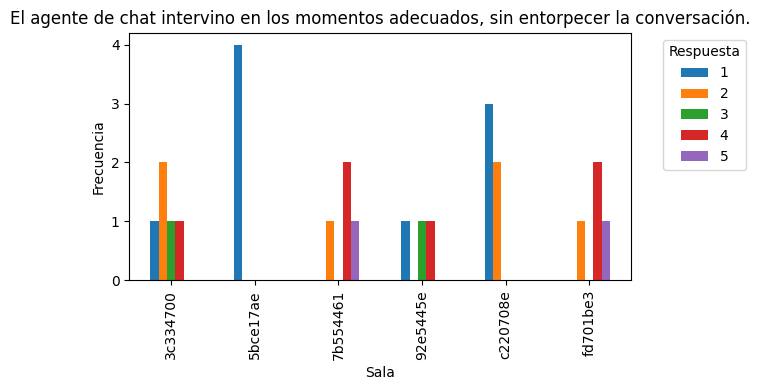

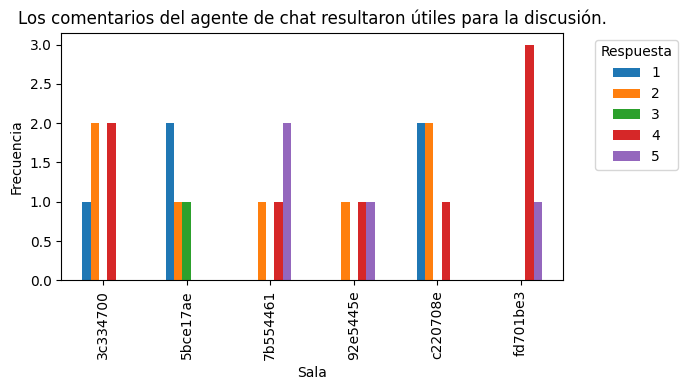

In [63]:
import matplotlib.pyplot as plt

for pregunta, tabla in frecuencias.items():
    ax = tabla.plot(kind='bar', figsize=(7,4))

    plt.title(pregunta)
    plt.xlabel("Sala")
    plt.ylabel("Frecuencia")

    # 🔥 Mover la leyenda fuera
    ax.legend(title="Respuesta", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()



In [1]:
import pandas as pd
import numpy as np

# Cargar CSV
df = pd.read_csv('Test de Usabilidad para Agente de Chat.csv') 

# Listado de columnas cuantitativas (excepto texto libre)
quant_cols = [
    "Creo que podría usar el agente de chat frecuentemente",
    "Encuentro el agente de chat innecesariamente complejo",
    "Creo que el agente de chat fue fácil de utilizar",
    "Creo que necesitaría ayuda de una persona con conocimientos técnicos para usar el agente de chat",
    "Las funciones del agente de chat están bien integradas",
    "Creo que el agente de chat es muy inconsistente",
    "Imagino que la mayoría de la gente aprendería a usar el agente de chat en forma muy rápida",
    "Encuentro que el agente de chat es muy difícil de usar",
    "Me siento confiado al usar el agente de chat",
    "Necesité aprender muchas cosas antes de ser capaz de usar el agente de chat",
    "Los mensajes del agente de chat me motivaron a explicar mis ideas con mayor profundidad.",
    "El agente de chat me entregó indicaciones útiles para fortalecer mis argumentos.",
    "El agente de chat actuó como mediador para que los participantes pudieran apreciar distintos enfoques éticos o conceptuales.",
    "El agente de chat intervino en los momentos adecuados, sin entorpecer la conversación.",
    "Los comentarios del agente de chat resultaron útiles para la discusión."
]

# Calcular medias y desviaciones estándar
stats = df[quant_cols].agg(["mean", "std"]).T
stats


,mean,std
Creo que podría usar el agente de chat frecuentemente,2.653846,1.231010
Encuentro el agente de chat innecesariamente complejo,2.384615,1.298520
Creo que el agente de chat fue fácil de utilizar,3.961538,1.076319
Creo que necesitaría ayuda de una persona con conocimientos técnicos para usar el agente de chat,1.653846,1.017539
Las funciones del agente de chat están bien integradas,3.307692,1.192283
Creo que el agente de chat es muy inconsistente,2.769231,1.394495
Imagino que la mayoría de la gente aprendería a usar el agente de chat en forma muy rápida,4.076923,1.128648
Encuentro que el agente de chat es muy difícil de usar,1.692308,1.010712
Me siento confiado al usar el agente de chat,3.230769,1.335895
Necesité aprender muchas cosas antes de ser capaz de usar el agente de chat,1.384615,0.897861


In [2]:
# Ítems SUS en orden
sus_items = [
    "Creo que podría usar el agente de chat frecuentemente", # positivo
    "Encuentro el agente de chat innecesariamente complejo", # negativo
    "Creo que el agente de chat fue fácil de utilizar", # positivo
    "Creo que necesitaría ayuda de una persona con conocimientos técnicos para usar el agente de chat", # negativo
    "Las funciones del agente de chat están bien integradas", # positivo
    "Creo que el agente de chat es muy inconsistente", # negativo
    "Imagino que la mayoría de la gente aprendería a usar el agente de chat en forma muy rápida", # positivo
    "Encuentro que el agente de chat es muy difícil de usar", # negativo
    "Me siento confiado al usar el agente de chat", # positivo
    "Necesité aprender muchas cosas antes de ser capaz de usar el agente de chat" # negativo
]

sus_df = df[sus_items].copy()

# Identificar qué ítems son positivos (pos) y negativos (neg)
pos = [0, 2, 4, 6, 8]  # índices
neg = [1, 3, 5, 7, 9]

# Convertir a puntaje SUS
for i in pos:
    sus_df.iloc[:, i] = sus_df.iloc[:, i] - 1

for i in neg:
    sus_df.iloc[:, i] = 5 - sus_df.iloc[:, i]

# Puntaje total
df["SUS"] = sus_df.sum(axis=1) * 2.5

df["SUS"].describe()


count    26.000000
mean     68.365385
std      17.563347
min      22.500000
25%      56.250000
50%      70.000000
75%      82.500000
max      97.500000
Name: SUS, dtype: float64

In [3]:
q_beneficios = df["¿Qué es para ti lo más beneficioso de usar el agente de chat?"].dropna()
q_mejoras = df["¿Qué aspectos del agente de chat consideras que tienen que ser mejorados?"].dropna()

print("=== Respuestas: Beneficios ===")
for r in q_beneficios:
    print("-", r)

print("\n=== Respuestas: Mejoras ===")
for r in q_mejoras:
    print("-", r)


=== Respuestas: Beneficios ===
- puede seguir la conversación 
- identifico bien los que partes de los argumentos estaban incompletos (necesidad de ejemplos o señalar los limites de ayudarlo o no)
- que es consiso a la hora de seguir el debate
- cuando no sabia que mas escribir de la situacion, me hacia preguntas y continuaba la conversacion
- Tener una vision objetiva de los hechos
- que motiva la participación al comienzo del debate
- El rol de mediador y orientador fomentan la discusion y sacan de los participantes más opiniones
- Ayudo a guiar la conversacion, especialmente al principio.
- Ayuda a avanzar en la conversación. Con un tema complicado como ética hay que pensar bien las cosas que decir o que aportar. La IA ayuda a centrar a las personas a expresarse.
- Que nos haga opinar con respecto a otros amigos.
- Me indica claramente donde mejorar
- Algunos de las intervenciones que realiza son un poco útiles para expandir ideas
- no lo encontre muy beneficioso 
- Poder discutir c